**Submitted by: Group G4**->(Umesha B K,Raja Ram Chaudhary,Gowthami R)<br>
**2020-06-15**

![](airindia.png)
<h1 style="text-align:center;"> Air Fare prediction Analysis</h1>

## Table of Contents
1. [Business Understanding](#1)<br>
2. [Analytic Approach](#2)<br>  
3. [Exploratory Data Analysis (EDA)](#3)<br>
3.1[Descriptive Statistical Analysis](#15)<br>
4. [Data Preparation](#4)<br>
5. [Setting up Environment](#5)<br>
6. [Comparing All Models](#6)<br> 
7. [Create Model](#7)<br>
8. [Tune Model](#8)<br>
9. [Model Ensembling](#9)<br>
10.[Model Analysis](#10)<br>
10.1[Forecasting](#100)<br>
11.[Predict on Test](#11)<br>
12.[Finalize Model for Deployment](#12)<br> 
13.[Saving the Model](#13)<br>

### Used Data Scientist Tools:
<ul>
    <li>Jupyter Notebook-6.0.3 </li>
    <li>Python-3.6.10 </li>
    <li>iPython-7.13.0 </li>
    <li>Numpy-1.18.4 </li>
    <li>Pandas-1.0.3 </li>
    <li>Matplotlib-3.2.1 </li>
    <li>Seaborn-0.10.1 </li>
    <li>Scipy-1.4.1 </li>
    <li>Scikit-learn-0.22 </li>
    ----------------------------<br>
    <li>Special package:** PyCaret-1.0.0</li>
</ul>    

## Business Understanding  <a id="1"></a>
This is the **Data Science Methodology**, a flowchart that begins with business understanding.<br>
Q: What is the problem that we are tried to solve?    

Air travel is the safest mode of transport in any times. Passengers are therefore likely to switch in large numbers away from rail and car to air travel. India’s commercial aircraft are around 670 & skies are empty now.India’s aviation system is going to boom because of oil prices are decreased. In this time, Passengers want to fly in cheaper rate but companies want to generate valuable revenue at same time. Due to this, there has fluctuations in price of Air (AirFare) over time to get seat. This is the problem to solve by building a predictive model by exploring previous airfare data.

**Business objective-** To predict airfare, as domestic air travel is popular these days in India with different air ticket booking channels, travelers are trying to make sense and understand how airlines price their tickets over time. 
We want you to explore previous airfare data and build a model to predict the price fluctuations over time so that the consumer could benefit from it. We want you to identify dependency over many endogenous variables. You are free to look at different models from the space of forecasting and regression.

## Analytic Approach<a id="2"></a>
<li> How can we used data to answer the question?

After we have acquired the data, we have done the followings:

Diagnosed data quality:
<li>If there has a problem with data quality.</li>
<li>The data has corrected.</li>
<li>Explored data to understand the data and find scenarios for performing the analysis.</li>
<li>Identify dependency over many endogenous variables.</li>
<li>Compared different models to evaluate best model.</li>

The **pycaret** package made these steps fast and easy:

<li>Performed data diagnosis or automatically generated a data diagnosis report.</li>
<li>Discovered data in a variety of ways, and automatically generated EDA report.</li>
<li>Imputated missing values and outliers, resolved skewed data. And generated an automated report to support it.</li>

Particularly in data exploration and data wrangling, it increased the efficiency of the pycaret package.

 Import necessaries library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read given data by help of pandas function 

In [2]:
data = pd.read_csv('C:\\Users\\Raja\\Desktop\\project\\project2020\\air_fair.csv')

## Exploratory Data Analysis (EDA)<a id="3"></a>

Show top 5 records

In [3]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType
0,1/12/18 11:43,2160.00,Other Product,Domestic
1,1/12/18 11:43,0.49,Other Product,Domestic
2,1/12/18 13:01,6550.00,Air,Domestic
3,1/12/18 13:10,6550.00,Air,Domestic
4,30/11/2018 14:30,5497.00,Air,Domestic


InvoiceDate converted int datetime format

In [4]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

Extraction of Date, Year, Month, Day, Hour & Minute from InvoiceDate columns

In [5]:
data['Date']=data['InvoiceDate'].dt.date
data['Year']=data['InvoiceDate'].dt.year
data['Month']=data['InvoiceDate'].dt.month
data['Day']=data['InvoiceDate'].dt.day
data['Hour']=data['InvoiceDate'].dt.hour
data['Minute']=data['InvoiceDate'].dt.minute
data

,InvoiceDate,NetFare,ProductType,ItineraryType,Date,Year,Month,Day,Hour,Minute
0,2018-01-12 11:43:00,2160.00,Other Product,Domestic,2018-01-12,2018.0,1.0,12.0,11.0,43.0
1,2018-01-12 11:43:00,0.49,Other Product,Domestic,2018-01-12,2018.0,1.0,12.0,11.0,43.0
2,2018-01-12 13:01:00,6550.00,Air,Domestic,2018-01-12,2018.0,1.0,12.0,13.0,1.0
3,2018-01-12 13:10:00,6550.00,Air,Domestic,2018-01-12,2018.0,1.0,12.0,13.0,10.0
4,2018-11-30 14:30:00,5497.00,Air,Domestic,2018-11-30,2018.0,11.0,30.0,14.0,30.0
...,...,...,...,...,...,...,...,...,...,...
278461,2019-10-06 20:45:00,0.00,Air,Domestic,2019-10-06,2019.0,10.0,6.0,20.0,45.0
278462,2019-10-06 21:39:00,9073.00,Air,Domestic,2019-10-06,2019.0,10.0,6.0,21.0,39.0
278463,2019-10-06 22:18:00,2367.00,Air,Domestic,2019-10-06,2019.0,10.0,6.0,22.0,18.0
278464,2019-10-06 22:30:00,6572.00,Air,Domestic,2019-10-06,2019.0,10.0,6.0,22.0,30.0


Drop InvoiceDate column after formation of Date, Year, Month, Day, Date, Hour & Minute from InvoiceDate columns

In [6]:
data.drop(["InvoiceDate"], axis=1, inplace=True)

Rearrange of columns as our choices

In [7]:
data = data[['Date','Year', 'Month','Day','Hour','Minute','ProductType','ItineraryType','NetFare']]
data.head()

,Date,Year,Month,Day,Hour,Minute,ProductType,ItineraryType,NetFare
0,2018-01-12,2018.0,1.0,12.0,11.0,43.0,Other Product,Domestic,2160.00
1,2018-01-12,2018.0,1.0,12.0,11.0,43.0,Other Product,Domestic,0.49
2,2018-01-12,2018.0,1.0,12.0,13.0,1.0,Air,Domestic,6550.00
3,2018-01-12,2018.0,1.0,12.0,13.0,10.0,Air,Domestic,6550.00
4,2018-11-30,2018.0,11.0,30.0,14.0,30.0,Air,Domestic,5497.00


Converting data types on suitable format as mention below

In [8]:
#data['Year']=pd.to_datetime(data['float'])
data['Year']=data['Year'].astype('float')
data['Month']=data['Month'].astype('float')
data['Day']=data['Day'].astype('float')
data['Hour']=data['Hour'].astype('float')
data['Minute']=data['Minute'].astype('float')

Show total counts of records in different Years

In [9]:
data.Year.value_counts()

2019.0    209678
2018.0     68786
Name: Year, dtype: int64

↑ Above stat shows that Year 2019 has much transactions & good bussiness in compare with 2018.

Show total counts of records in different Months

In [10]:
data.Month.value_counts()

5.0     47262
3.0     37245
2.0     33436
1.0     31571
10.0    19096
12.0    17114
11.0    16938
9.0     16476
4.0     15920
7.0     15340
6.0     14220
8.0     13846
Name: Month, dtype: int64

↑Above stat shows that Month "May" passengers travelled much. August Month is not perfect session for travelling.

Show total counts of records in different dates

In [11]:
data.Date.value_counts()

2019-06-05    2427
2019-05-30    2341
2019-10-06    2326
2019-05-13    2276
2019-03-05    2251
              ... 
2018-01-04      31
2018-04-22      26
2018-05-27      25
2019-04-28      21
2018-07-31       5
Name: Date, Length: 425, dtype: int64

↑ Above counts shows that the NetFare records at date of 2019-06-05 is maximum and minimum at 2018-07-31. Google shows that maximum transaction recods due to celebration day declared by UN , World Environment Day & minimum due to leap month.

Show total counts of records in different hours

In [12]:
data.Hour.value_counts()

17.0    26509
16.0    25434
12.0    25282
15.0    24968
14.0    23487
13.0    23340
18.0    22236
11.0    22158
19.0    15690
10.0    14810
20.0    11631
21.0     9572
22.0     7963
9.0      7154
23.0     6594
0.0      3367
8.0      3143
7.0      1464
1.0      1241
2.0       783
6.0       585
5.0       379
3.0       355
4.0       319
Name: Hour, dtype: int64

↑ Above counts shows that NetFare records at the time (hour of time) 17.0(5:00 PM) is maximum and minimum at 4.0(4:00 AM) morning. It means people buy or book theirs ticket after office time and minimum at 4:00 oclock morning at end of sleep.

Show total counts of records in different Minutes

In [13]:
data.Minute.value_counts()

1.0     7354
13.0    6856
25.0    6818
37.0    6459
49.0    6213
46.0    5322
16.0    5270
6.0     5246
0.0     5103
56.0    5076
31.0    5057
45.0    5030
36.0    5006
30.0    4919
15.0    4893
26.0    4814
21.0    4752
11.0    4674
34.0    4623
51.0    4601
4.0     4599
10.0    4576
50.0    4552
54.0    4531
35.0    4527
22.0    4522
55.0    4483
20.0    4477
2.0     4408
24.0    4407
18.0    4406
14.0    4404
38.0    4375
48.0    4367
44.0    4357
40.0    4350
41.0    4322
28.0    4311
58.0    4310
42.0    4307
8.0     4290
32.0    4258
33.0    4247
12.0    4231
3.0     4222
52.0    4179
7.0     4179
47.0    4176
53.0    4106
27.0    4098
19.0    4094
43.0    4091
59.0    4068
23.0    4067
57.0    4047
17.0    3986
39.0    3985
29.0    3853
5.0     3815
9.0     3795
Name: Minute, dtype: int64

↑ Above counts shows that NetFare records booked or baught at 1 minute later than integer hour. Working of booking starts at certain integer hour and finish within in minute. 

Parse strings to datetime type 

In [14]:
data['Date'] = pd.to_datetime(data.Date, infer_datetime_format=True)
df=data.set_index(['Date'])

Data index sorted

In [15]:
df.sort_values(by='Date').head()

,Year,Month,Day,Hour,Minute,ProductType,ItineraryType,NetFare
Date,,,,,,,,
2018-01-04,2018.0,1.0,4.0,8.0,26.0,Air,Domestic,8222.0
2018-01-04,2018.0,1.0,4.0,9.0,17.0,Air,Domestic,3418.0
2018-01-04,2018.0,1.0,4.0,22.0,38.0,Air,Domestic,6261.0
2018-01-04,2018.0,1.0,4.0,21.0,12.0,Air,Domestic,3473.0
2018-01-04,2018.0,1.0,4.0,20.0,59.0,Air,Domestic,5011.0


Time Series Plot

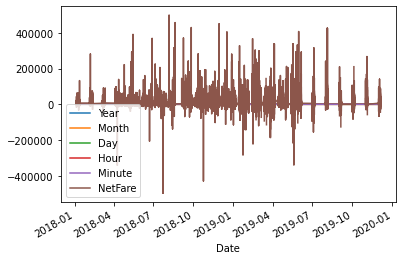

In [16]:
df.plot()

↑ Above plot not shows as like time series. There are empty spaces between bars in horizontal line. Peaks of bar has more outliers.

Text(0, 0.5, 'NetFare')

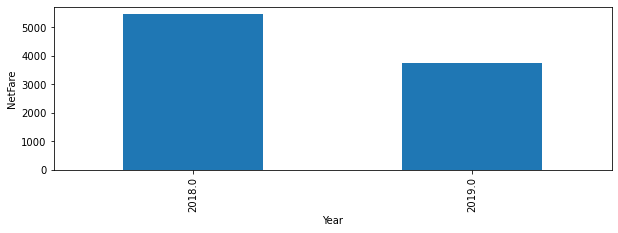

In [17]:
fig = plt.figure(figsize=(10,3))
df.groupby('Year')['NetFare'].mean().plot.bar()  
plt.xlabel('Year')
plt.ylabel('NetFare')

↑ It is obvious that NetFare was high in 2018.

Text(0, 0.5, 'NetFare')

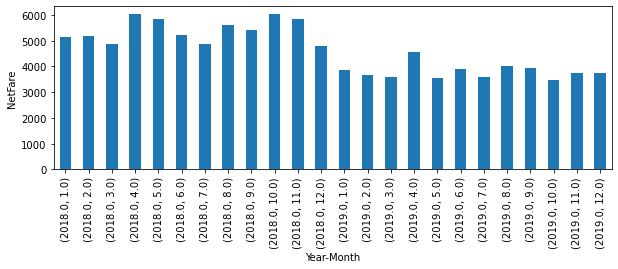

In [18]:
fig = plt.figure(figsize=(10,3))
df.groupby(['Year','Month'])['NetFare'].mean().plot.bar()  
plt.xlabel('Year-Month')
plt.ylabel('NetFare')

↑ It is obvious that NetFare was high in Year 2018 with Month.

Text(0, 0.5, 'NetFare')

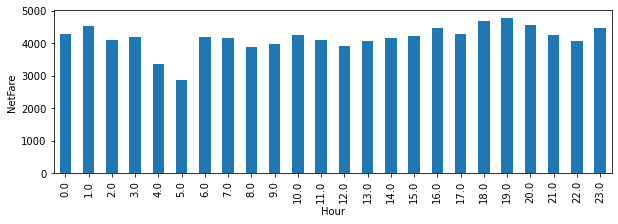

In [19]:
fig = plt.figure(figsize=(10,3))
df.groupby('Hour')['NetFare'].mean().plot.bar()  
plt.xlabel('Hour')
plt.ylabel('NetFare')

↑ Peak of bar at 19:00 PM is high and lowest at 5:00 AM. See, NetFare at above time are 4800 & 3000 Rupees respectively.

Text(0, 0.5, 'NetFare')

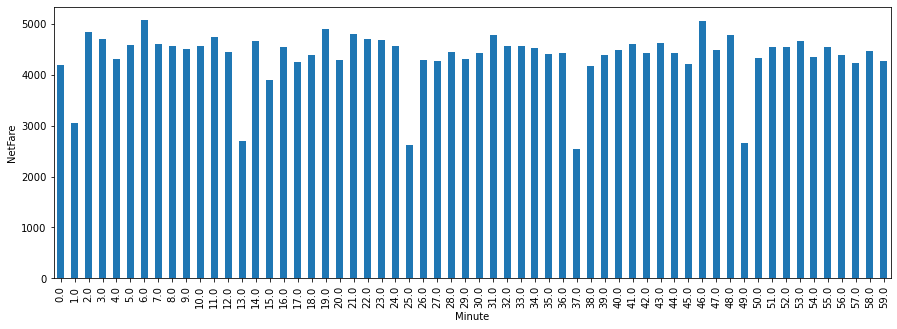

In [20]:
fig = plt.figure(figsize=(15,5))
df.groupby('Minute')['NetFare'].mean().plot.bar()  
plt.xlabel('Minute')
plt.ylabel('NetFare')

↑ NetFare at 6,19,31,46 minutes are high & at 13,25,37,49 minutes are low. See, low NetFare are nearly 3000 rupees.

#### Descriptive Statistical Analysis <a id="15"></a>

Show the general info about dataframe

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278466 entries, 2018-01-12 to 2019-10-06
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           278464 non-null  float64
 1   Month          278464 non-null  float64
 2   Day            278464 non-null  float64
 3   Hour           278464 non-null  float64
 4   Minute         278464 non-null  float64
 5   ProductType    278464 non-null  object 
 6   ItineraryType  245689 non-null  object 
 7   NetFare        217576 non-null  float64
dtypes: float64(6), object(2)
memory usage: 19.1+ MB


↑ DatetimeIndex: 278466 entries, 2018-01-12 to 2019-10-06. See Dtype also.

Show unique value of ProductType 

In [22]:
df.ProductType.unique()

array(['Other Product', 'Air', 'Charge', 'Hotel', 'Air Cancellation',
       'Other Product Cancellation', 'payment', 'Hotel Cancellation',
       'refund', nan, 'Air Debit Note', 'Hotel Debit Note', 'Air Loss',
       'Other Product Debit Note', 'Hotel Loss'], dtype=object)

Show unique value of Itinerary column

In [23]:
df.ItineraryType.unique()

array(['Domestic', nan, 'International'], dtype=object)

Show the statistical calculations of dataframe

In [24]:
df.describe().round(2)

,Year,Month,Day,Hour,Minute,NetFare
count,278464.00,278464.00,278464.00,278464.00,278464.00,217576.00
mean,2018.75,5.55,14.05,14.83,29.14,4266.91
std,0.43,3.43,9.55,4.20,17.34,9803.14
min,2018.00,1.00,1.00,0.00,0.00,-497324.00
25%,2019.00,3.00,5.00,12.00,14.00,10.00
50%,2019.00,5.00,14.00,15.00,29.00,3501.00
75%,2019.00,9.00,22.00,18.00,44.00,5944.00
max,2019.00,12.00,31.00,23.00,59.00,497678.00


↑ Concentrate on NetFare Columns. We already seen many plots have average netfare 3000-5000. But see value now,-497324 & 497678. These are 100% outliers. So, suggest go through clean Data Preparaion.

## Data Preparation <a id="4"></a>

<h4>Evaluating for Missing Data</h4>
There are two methods to detect missing data:
<ol>
 <li><b>.isnull()</b></li>
 <li><b>.notnull()</b></li>
</ol>   

Find missing value by Boolean method:
**"True"** stands for missing value, while **"False"** stands for not missing value.

In [25]:
missing_value = df.isnull()
missing_value

,Year,Month,Day,Hour,Minute,ProductType,ItineraryType,NetFare
Date,,,,,,,,
2018-01-12,False,False,False,False,False,False,False,False
2018-01-12,False,False,False,False,False,False,False,False
2018-01-12,False,False,False,False,False,False,False,False
2018-01-12,False,False,False,False,False,False,False,False
2018-11-30,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2019-10-06,False,False,False,False,False,False,False,False
2019-10-06,False,False,False,False,False,False,False,False
2019-10-06,False,False,False,False,False,False,False,False


### Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column.<br>
**"True" stands for missing value, while "False" stands for not missing value**

In [26]:
for column in missing_value.columns.values.tolist():
    print(column)
    print (missing_value[column].value_counts())
    print("") 

Year
False    278464
True          2
Name: Year, dtype: int64

Month
False    278464
True          2
Name: Month, dtype: int64

Day
False    278464
True          2
Name: Day, dtype: int64

Hour
False    278464
True          2
Name: Hour, dtype: int64

Minute
False    278464
True          2
Name: Minute, dtype: int64

ProductType
False    278464
True          2
Name: ProductType, dtype: int64

ItineraryType
False    245689
True      32777
Name: ItineraryType, dtype: int64

NetFare
False    217576
True      60890
Name: NetFare, dtype: int64



Based on the summary above, each column has 278466 rows of data, all columns containing missing data:
<ol>
<li>"Year","Month","Day","Hour","Minute": 2 missing data</li>
<li>"ProductType": 2 missing data</li>
<li>"ItineraryType": 32777 missing data</li>    
<li>"NetFare": 60890 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>

<b>Drop rows:</b>
<ol>
    <li>"Year","Month","Day","Hour","Minute": 2 missing data, drop them , two observations among large dataset are not so big deals</li>
    <li>"ProductType": 2 missing data, drop them , two observations among large dataset are not so big deals</li>
    <li>"ItineraryType": 32777 missing data, drop them , they are totally empty, we have huge data</li>
    <li>"NetFare": 60890 missing data, drop whole rows, they are totally empty</li>  
</ol>

Show data types

Drop missing values **["Year","Month","Day","Hour","Minute"]** in observations, the two rows are negelegible

In [27]:
df.dropna(subset=["Year","Month","Day","Hour","Minute"], axis=0, inplace=True)

Drop missing values **[ProductType]** in observations, the two rows are negelegible 

In [28]:
df.dropna(subset=["ProductType"], axis=0, inplace=True)

Drop missing values **[ItineraryType]** in observations, they are not very sensitive 

In [29]:
df.dropna(subset=["ItineraryType"], axis=0, inplace=True)

Drop missing values **[NetFare]** in observations, they are completly empty 

In [30]:
df.dropna(subset=["NetFare"], axis=0, inplace=True)

Reset index, because we droped many rows & sorted

In [31]:
df.reset_index().sort_values(by='Date').head()

,Date,Year,Month,Day,Hour,Minute,ProductType,ItineraryType,NetFare
93239,2018-01-04,2018.0,1.0,4.0,17.0,28.0,Air,Domestic,7515.0
93227,2018-01-04,2018.0,1.0,4.0,13.0,25.0,Air,Domestic,5168.0
93250,2018-01-04,2018.0,1.0,4.0,22.0,38.0,Air,Domestic,6261.0
93249,2018-01-04,2018.0,1.0,4.0,21.0,12.0,Air,Domestic,3473.0
93248,2018-01-04,2018.0,1.0,4.0,20.0,59.0,Air,Domestic,5011.0


**Final Clean** data

In [32]:
df_clean = df.isnull()

**"True" stands for missing value, while "False" stands for not missing value**

In [33]:
for column in df_clean.columns.values.tolist():
    print(column)
    print (df_clean[column].value_counts())
    print("") 

Year
False    184800
Name: Year, dtype: int64

Month
False    184800
Name: Month, dtype: int64

Day
False    184800
Name: Day, dtype: int64

Hour
False    184800
Name: Hour, dtype: int64

Minute
False    184800
Name: Minute, dtype: int64

ProductType
False    184800
Name: ProductType, dtype: int64

ItineraryType
False    184800
Name: ItineraryType, dtype: int64

NetFare
False    184800
Name: NetFare, dtype: int64



RAW Data observations=**278466**, CLEANED Data observations=**184800**

**Box Plot** to find out the outliers:

In [34]:
import seaborn as sns

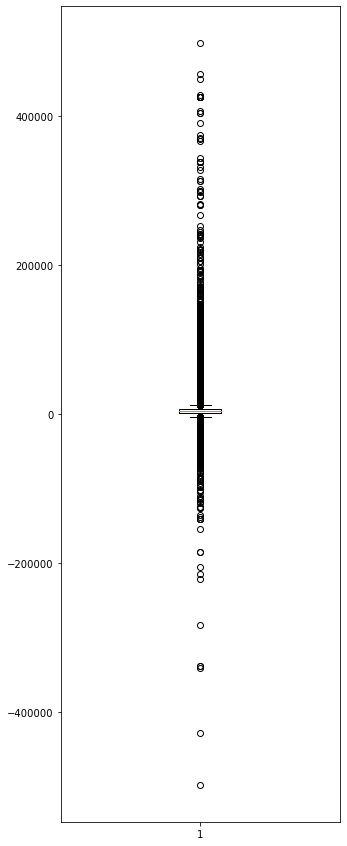

In [35]:
fig, ax1=plt.subplots()
fig.set_size_inches(5,15)
plt.boxplot(df["NetFare"])
plt.show()

↑ Box-plot shows much outliers both sides, it has to remove, actually outliers makes execution lazy and make noise.

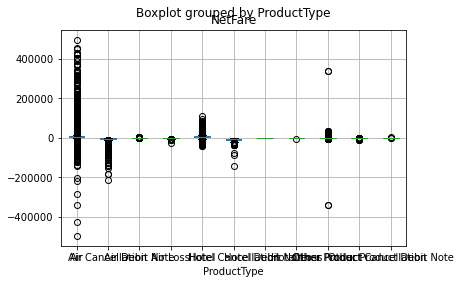

In [36]:
df.boxplot(column='NetFare', by='ProductType')

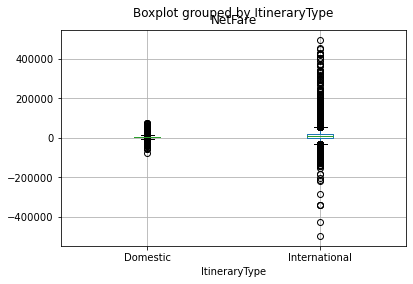

In [37]:
df.boxplot(column='NetFare', by='ItineraryType')

↑ Compared with International NetFare, Domestic airfare has less outliers, advised to remove outliers in both variables

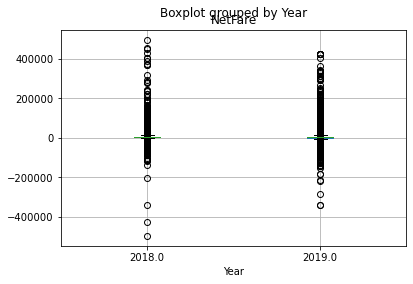

In [38]:
df.boxplot(column='NetFare', by='Year')

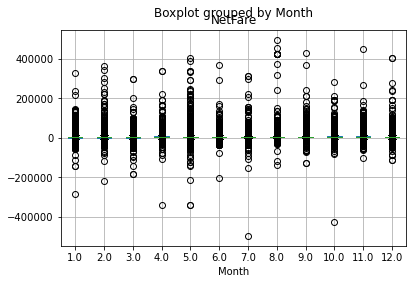

In [39]:
df.boxplot(column='NetFare', by='Month')

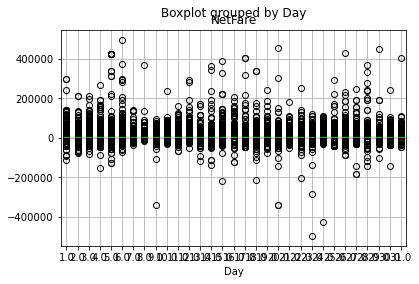

In [40]:
df.boxplot(column='NetFare', by='Day')

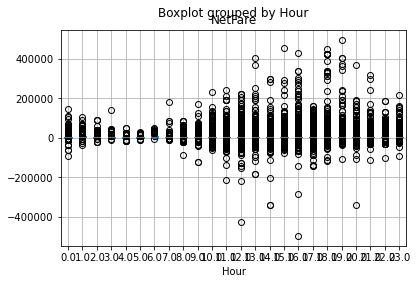

In [41]:
df.boxplot(column='NetFare', by='Hour')

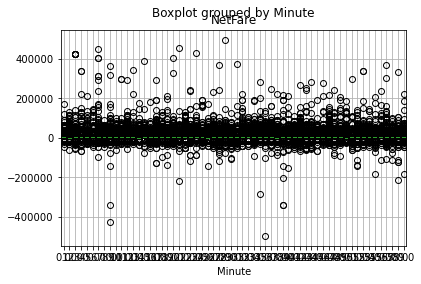

In [42]:
df.boxplot(column='NetFare', by='Minute')

↑ Above all box-plots show that there has much outliers in every columns. So, there has necessary to remove.

Histogram plot of NetFare

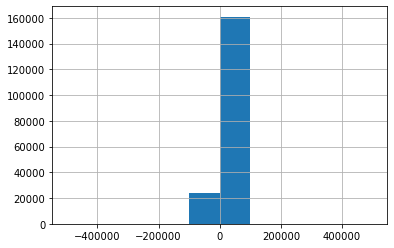

In [43]:
df.NetFare.hist()

↑ By graph can be analysed that negative values are also existed. Nearly 25000 transactions are with negative values.

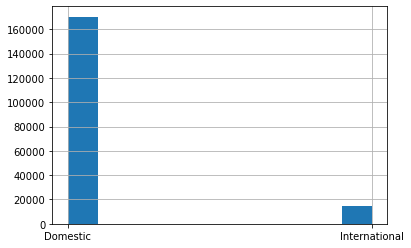

In [44]:
df.ItineraryType.hist()

↑ Counts of Domestic AirFare consists of huge amounts.

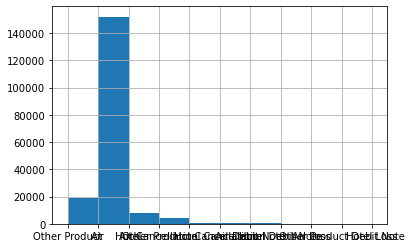

In [45]:
df.ProductType.hist()

↑ By graph can be conclude that Sub-type Air of ProductType plays main role in a group. It means correlation with NetFare should be strong.

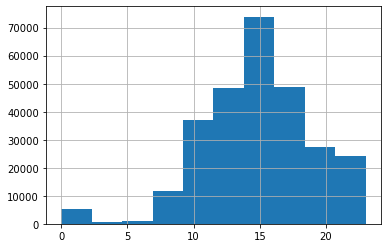

In [46]:
data.Hour.hist()

↑ Plot shows that 14:00 PM-16:00 PM, after lunch time, people book or buy NetFare services. Minimest interaction at (2:00 AM-4:00 AM)

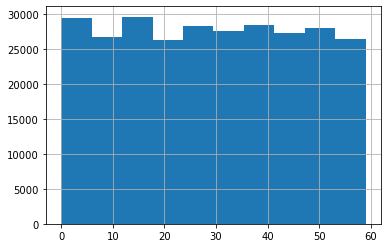

In [47]:
data.Minute.hist()

↑ Plot shows that nobody booked or baught NetFare Services at 59:00 minute. Clear insight.

#### Identifying Outliers with Interquartile Range (IQR)

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  
print(IQR)

Year          1.0
Month         6.0
Day          18.0
Hour          6.0
Minute       30.0
NetFare    4314.0
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [49]:
print((df  < (Q1 - 1.5 * IQR)) | (df  > (Q3 + 1.5 * IQR)))

              Day   Hour  ItineraryType  Minute  Month  NetFare  ProductType  \
Date                                                                           
2018-01-12  False  False          False   False  False    False        False   
2018-01-12  False  False          False   False  False    False        False   
2018-01-12  False  False          False   False  False    False        False   
2018-01-12  False  False          False   False  False    False        False   
2018-11-30  False  False          False   False  False    False        False   
...           ...    ...            ...     ...    ...      ...          ...   
2019-10-06  False  False          False   False  False    False        False   
2019-10-06  False  False          False   False  False    False        False   
2019-10-06  False  False          False   False  False    False        False   
2019-10-06  False  False          False   False  False    False        False   
2019-10-06  False  False          False 

#### Identifying skewness 

In [50]:
print(df['NetFare'].skew())
df['NetFare'].describe()

11.13246139839976


count    184800.000000
mean       5023.444511
std       10456.402099
min     -497324.000000
25%        2156.000000
50%        4125.000000
75%        6470.000000
max      497678.000000
Name: NetFare, dtype: float64

↑ Data is highly right skewed (11.13). Max value is 497678.It is due to outliers. So, there has necessary to delete outliers. 

We use the **IQR method** to delete outliers from records

In [51]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(167132, 8)


In [52]:
df_out.reset_index().sort_values(by='Date')

,Date,Year,Month,Day,Hour,Minute,ProductType,ItineraryType,NetFare
84394,2018-01-04,2018.0,1.0,4.0,17.0,50.0,Air,Domestic,3577.0
84395,2018-01-04,2018.0,1.0,4.0,17.0,50.0,Air,Domestic,3577.0
84375,2018-01-04,2018.0,1.0,4.0,8.0,26.0,Air,Domestic,8222.0
84376,2018-01-04,2018.0,1.0,4.0,9.0,17.0,Air,Domestic,3418.0
84378,2018-01-04,2018.0,1.0,4.0,12.0,0.0,Air,Domestic,3625.0
...,...,...,...,...,...,...,...,...,...
63505,2019-12-05,2019.0,12.0,5.0,14.0,52.0,Air,Domestic,2305.0
63506,2019-12-05,2019.0,12.0,5.0,14.0,57.0,Air Cancellation,Domestic,-3600.0
63507,2019-12-05,2019.0,12.0,5.0,14.0,58.0,Other Product,Domestic,127.0
63497,2019-12-05,2019.0,12.0,5.0,14.0,51.0,Air,Domestic,3150.0


Among CLEAN Data observations=**184800**, after delation of outlier REMAINDER Data observations=**167132** 

### Re-Check outliers by Box-Plot 

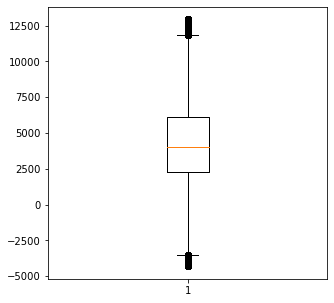

In [53]:
fig, ax1=plt.subplots()
fig.set_size_inches(5,5)
plt.boxplot(df_out["NetFare"])
plt.show()

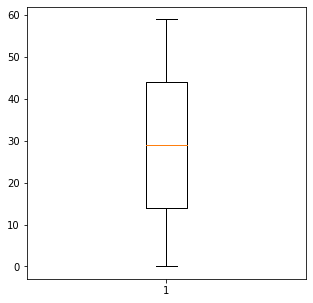

In [54]:
fig, ax1=plt.subplots()
fig.set_size_inches(5,5)
plt.boxplot(df_out["Minute"])
plt.show()

↑ **Oah..**, we got box plot with free outliers. Its great

In [55]:
print(df_out['NetFare'].skew())
df_out['NetFare'].describe()

0.10411093606819426


count    167132.000000
mean       4144.839089
std        3034.322278
min       -4315.000000
25%        2250.000000
50%        4050.000000
75%        6092.000000
max       12941.000000
Name: NetFare, dtype: float64

↑ See the Skewness=0.10, nearly 0. Data became normal distribution.

<b>Good!</b> Now, we obtain the dataset with no missing values, no outliers , no dispersion & sort indexed.

### Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Histogram of NetFare

Text(0.5, 1.0, 'NetFare-Counts Plot')

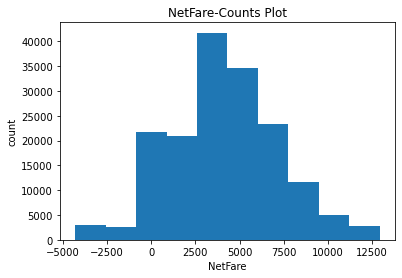

In [56]:
plt.hist(df_out["NetFare"])
plt.xlabel("NetFare")
plt.ylabel("count")
plt.title("NetFare-Counts Plot")

↑ Above plot shows that NetFare between 2500-4000 has nearly 50000.It means fifty thousands travellers baught ticket between 2500-4000 rupees or units of prices.

Create bar plot for ProductType

In [57]:
df_out['ProductType'].value_counts()

Air                           138445
Other Product                  18177
Hotel                           6783
Air Cancellation                2354
Other Product Cancellation       533
Air Debit Note                   533
Air Loss                         190
Hotel Cancellation                89
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

↑ ProductType Air and Hotel are distinct clear and maximum. Maximum has Air services and maximum has booked Hotel too or included.

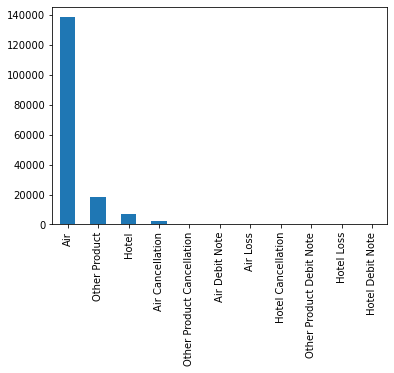

In [58]:
df_out['ProductType'].value_counts().plot(kind='bar')

↑ Other Product type is also high, but not clear what it is. Air & Hotel are distinct.

Create bar plot of ItineraryType ( Domestic, International)

In [59]:
df_out['ItineraryType'].value_counts()

Domestic         159599
International      7533
Name: ItineraryType, dtype: int64

In [ ]:
df_out['ItineraryType'].value_counts().plot(kind='bar')

↑ Travellers are not flying abroad much. It means peoples are flying inside country.

### Create dummie variables of ['ProductType', 'ItineraryType']

In [60]:
dummy_df=pd.get_dummies(df_out, columns=['ProductType', 'ItineraryType'], drop_first=False)

In [61]:
dummy_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'NetFare', 'ProductType_Air',
       'ProductType_Air Cancellation', 'ProductType_Air Debit Note',
       'ProductType_Air Loss', 'ProductType_Hotel',
       'ProductType_Hotel Cancellation', 'ProductType_Hotel Debit Note',
       'ProductType_Hotel Loss', 'ProductType_Other Product',
       'ProductType_Other Product Cancellation',
       'ProductType_Other Product Debit Note', 'ItineraryType_Domestic',
       'ItineraryType_International'],
      dtype='object')

In [62]:
dummy_df.rename(columns = {'ProductType_Air':'ProTypeAir','ProductType_Air Cancellation':'ProTypeAirCanc','ProductType_Air Debit Note':'ProTypeAirDebtNote','ProductType_Air Loss':'ProTypeAirLoss','ProductType_Hotel':'ProTypeHot','ProductType_Hotel Cancellation':'ProTypeHotCanc','ProductType_Hotel Debit Note':'ProTypeHotDebNote','ProductType_Hotel Loss':'ProTypeHotLoss','ProductType_Other Product':'ProTypeOthPro','ProductType_Other Product Cancellation':'ProTypeOthProCanc','ProductType_Other Product Debit Note':'ProTypeOthProDebNote','ItineraryType_Domestic':'IteTypeDomes','ItineraryType_International':'IteTypeInter'}, inplace=True)


In [63]:
dummy_df

,Year,Month,Day,Hour,Minute,NetFare,ProTypeAir,ProTypeAirCanc,ProTypeAirDebtNote,ProTypeAirLoss,ProTypeHot,ProTypeHotCanc,ProTypeHotDebNote,ProTypeHotLoss,ProTypeOthPro,ProTypeOthProCanc,ProTypeOthProDebNote,IteTypeDomes,IteTypeInter
Date,,,,,,,,,,,,,,,,,,,
2018-01-12,2018.0,1.0,12.0,11.0,43.0,2160.00,0,0,0,0,0,0,0,0,1,0,0,1,0
2018-01-12,2018.0,1.0,12.0,11.0,43.0,0.49,0,0,0,0,0,0,0,0,1,0,0,1,0
2018-01-12,2018.0,1.0,12.0,13.0,1.0,6550.00,1,0,0,0,0,0,0,0,0,0,0,1,0
2018-01-12,2018.0,1.0,12.0,13.0,10.0,6550.00,1,0,0,0,0,0,0,0,0,0,0,1,0
2018-11-30,2018.0,11.0,30.0,14.0,30.0,5497.00,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-06,2019.0,10.0,6.0,20.0,45.0,0.00,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-10-06,2019.0,10.0,6.0,21.0,39.0,9073.00,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-10-06,2019.0,10.0,6.0,22.0,18.0,2367.00,1,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
dummy_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'NetFare', 'ProTypeAir',
       'ProTypeAirCanc', 'ProTypeAirDebtNote', 'ProTypeAirLoss', 'ProTypeHot',
       'ProTypeHotCanc', 'ProTypeHotDebNote', 'ProTypeHotLoss',
       'ProTypeOthPro', 'ProTypeOthProCanc', 'ProTypeOthProDebNote',
       'IteTypeDomes', 'IteTypeInter'],
      dtype='object')

### Data Normalization
**Target:** Normalize variables so their value ranges from 0 to 1 & easy to compute & compare values.<br>
**Approach:** Using Normalization function.<br>

Using Normalization function 

In [65]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

Normalized data frame (considering the numerical part of data)

In [66]:
df_norm = norm_func(dummy_df.iloc[:,:])
df_norm.head(10).round(4)

,Year,Month,Day,Hour,Minute,NetFare,ProTypeAir,ProTypeAirCanc,ProTypeAirDebtNote,ProTypeAirLoss,ProTypeHot,ProTypeHotCanc,ProTypeHotDebNote,ProTypeHotLoss,ProTypeOthPro,ProTypeOthProCanc,ProTypeOthProDebNote,IteTypeDomes,IteTypeInter
Date,,,,,,,,,,,,,,,,,,,
2018-01-12,0.0,0.0000,0.3667,0.40,0.7288,0.3752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2018-01-12,0.0,0.0000,0.3667,0.40,0.7288,0.2501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2018-01-12,0.0,0.0000,0.3667,0.50,0.0169,0.6296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-01-12,0.0,0.0000,0.3667,0.50,0.1695,0.6296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-11-30,0.0,0.9091,0.9667,0.55,0.5085,0.5686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-01-12,0.0,0.0000,0.3667,0.55,0.1525,0.5293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-11-30,0.0,0.9091,0.9667,0.55,0.5085,0.3525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-01-12,0.0,0.0000,0.3667,0.50,0.1695,0.6731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-11-30,0.0,0.9091,0.9667,0.70,0.5085,0.6586,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Correlation heatmap of dataset

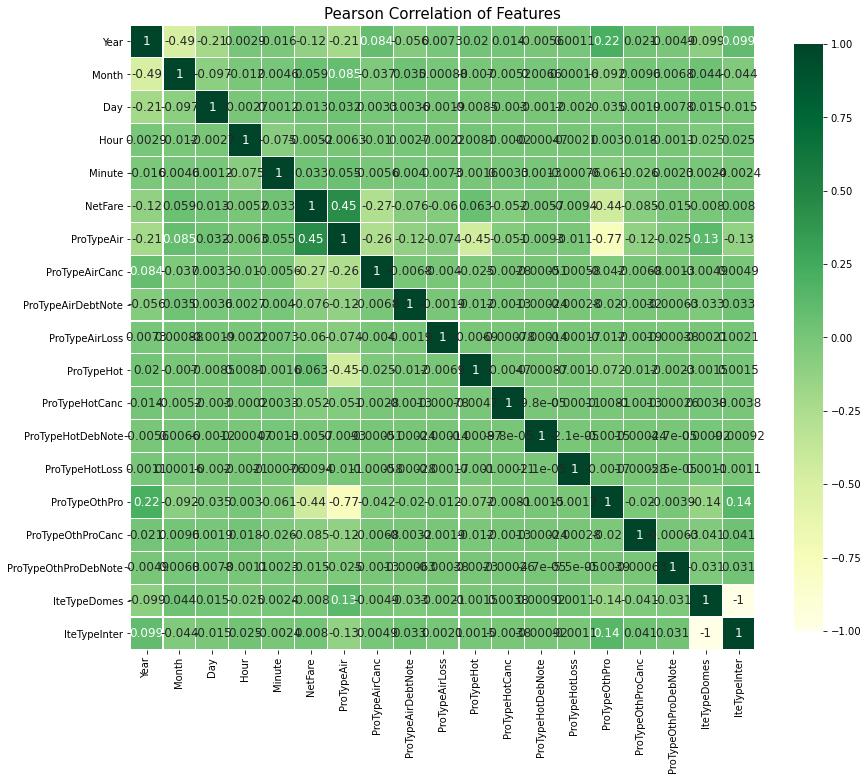

In [67]:
def correlation_heatmap(df_norm):
    hmap , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    hmap= sns.heatmap(
        df_norm.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_norm)

↑ Please go on NetFare columns. Pearson Correlation of Features (Month,Day,Hour,Minute, ProductType_Hotel,  & ItineraryType_International) shows that they are highly corelated i.e. positive values. Others variables less effective.

### Setting up Environment<a id="5"></a>

In [69]:
import pycaret

In [71]:
from pycaret.regression import *
env= setup(data = dummy_df, target = 'NetFare', session_id=2610,normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2610
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(167132, 19)"
4,Missing Values,False
5,Numeric Features,17
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Create Model<a id="7"></a>

Create Linear Regression model

In [74]:
lr= create_model('lr',fold=10, round = 4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1887.9237,6.531220e+06,2555.6251,0.3060,1.2473,2.8637
1,1874.8744,6.423350e+06,2534.4329,0.3074,1.3038,5.1192
2,1850.0676,6.237839e+06,2497.5666,0.3126,1.1965,2.6168
3,1862.4549,6.339180e+06,2517.7728,0.3103,1.2397,2.7485
4,1865.1001,6.326134e+06,2515.1807,0.3091,1.1986,3.0913
5,1869.1897,6.377828e+06,2525.4361,0.3072,1.2106,2.8812
6,1839.2083,6.205339e+06,2491.0518,0.3184,1.1875,2.9501
7,1869.4969,6.315595e+06,2513.0847,0.3120,1.2301,2.7402
8,1871.5006,6.406159e+06,2531.0390,0.3088,1.2136,3.5085
9,1891.3116,6.494889e+06,2548.5072,0.3096,1.2301,3.2296


Create Ridge Regression model

In [75]:
ridge=create_model('ridge',fold=10, round = 4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1887.9794,6.531236e+06,2555.6284,0.3060,1.2438,2.7711
1,1873.4264,6.422011e+06,2534.1687,0.3076,1.2746,4.6163
2,1850.0832,6.237896e+06,2497.5780,0.3126,1.1967,2.6170
3,1862.0746,6.338647e+06,2517.6669,0.3104,1.2292,2.5645
4,1864.4413,6.325267e+06,2515.0083,0.3092,1.1830,2.7844
5,1868.9771,6.377998e+06,2525.4699,0.3072,1.1950,2.5502
6,1839.0434,6.205118e+06,2491.0074,0.3184,1.1767,2.7657
7,1869.4319,6.315558e+06,2513.0774,0.3120,1.2297,2.7403
8,1871.4361,6.406081e+06,2531.0236,0.3088,1.2136,3.5086
9,1891.1060,6.494858e+06,2548.5011,0.3096,1.2180,3.0344


###  Tune Model<a id="8"></a>

Tuned model of Lenear regression

In [77]:
tuned_lr = tune_model('lr',fold=10)
tuned_lr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1887.9960,6.531244e+06,2555.6299,0.3060,1.2438,2.7711
1,1873.4308,6.421966e+06,2534.1599,0.3076,1.2746,4.6165
2,1850.0676,6.237839e+06,2497.5666,0.3126,1.1965,2.6168
3,1862.0860,6.338639e+06,2517.6654,0.3104,1.2292,2.5644
4,1864.4523,6.325154e+06,2514.9858,0.3092,1.1831,2.7843
5,1869.0106,6.378016e+06,2525.4735,0.3072,1.1951,2.5501
6,1839.0696,6.205156e+06,2491.0151,0.3184,1.1769,2.7656
7,1869.4969,6.315595e+06,2513.0847,0.3120,1.2301,2.7402
8,1871.5006,6.406159e+06,2531.0390,0.3088,1.2136,3.5085
9,1891.1570,6.494933e+06,2548.5158,0.3096,1.2180,3.0344


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

Tuned model of Ridge Regression model

In [78]:
tuned_ridge= tune_model('ridge',fold=10)
tuned_ridge

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1887.9898,6.531241e+06,2555.6293,0.3060,1.2438,2.7711
1,1873.4292,6.421983e+06,2534.1632,0.3076,1.2746,4.6164
2,1850.0736,6.237860e+06,2497.5708,0.3126,1.1966,2.6169
3,1862.0818,6.338641e+06,2517.6659,0.3104,1.2292,2.5644
4,1864.4495,6.325203e+06,2514.9955,0.3092,1.1831,2.7844
5,1868.9979,6.378009e+06,2525.4721,0.3072,1.1951,2.5501
6,1839.0587,6.205141e+06,2491.0120,0.3184,1.1768,2.7656
7,1869.4700,6.315573e+06,2513.0804,0.3120,1.2298,2.7402
8,1871.4735,6.406120e+06,2531.0313,0.3088,1.2136,3.5086
9,1891.1350,6.494895e+06,2548.5084,0.3096,1.2180,3.0344


Ridge(alpha=0.381, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=2610, solver='auto', tol=0.001)

### Model Ensembling<a id="9"></a>

Combined model of all tuned

In [79]:
blender = blend_models(estimator_list = [lr,ridge],fold=10)
blender

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1887.9476,6.531219e+06,2555.6250,0.3060,1.2455,2.8174
1,1873.9612,6.422372e+06,2534.2400,0.3075,1.2892,4.8670
2,1850.0754,6.237867e+06,2497.5721,0.3126,1.1966,2.6169
3,1862.2384,6.338819e+06,2517.7012,0.3104,1.2344,2.6565
4,1864.6987,6.325515e+06,2515.0577,0.3092,1.1909,2.9376
5,1869.0097,6.377822e+06,2525.4349,0.3072,1.2030,2.7154
6,1839.1094,6.205208e+06,2491.0255,0.3184,1.1821,2.8578
7,1869.4644,6.315571e+06,2513.0800,0.3120,1.2298,2.7403
8,1871.4683,6.406114e+06,2531.0303,0.3088,1.2136,3.5086
9,1891.1841,6.494824e+06,2548.4945,0.3096,1.2239,3.1319


VotingRegressor(estimators=[('Linear Regression_0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=2610, solver='auto',
                                   tol=0.001))],
                n_jobs=None, weights=None)

### Model Analysis<a id="10"></a>

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

#### Residual Plot

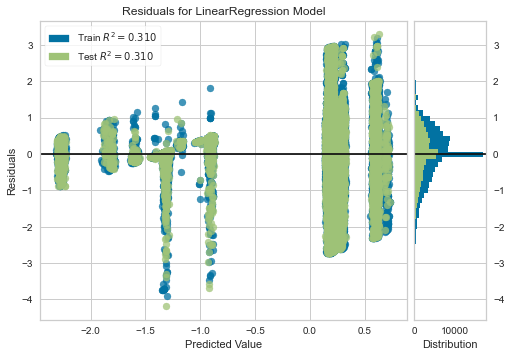

In [80]:
plot_model(tuned_lr)

↑ Residuals linear points resided both sides of horizontal median line 0 shows nearly equal and train, test values are fitted.

#### Recursive Feat. Selection

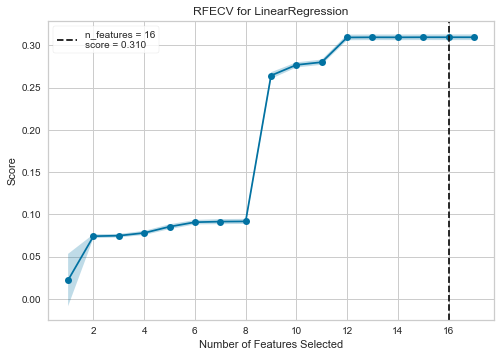

In [81]:
plot_model(tuned_lr, plot='rfe')

↑ Above plot shows that 2 feautures after vertical dotted line are less significant. These are not taken at model creation time. 

#### Prediction Error Plot

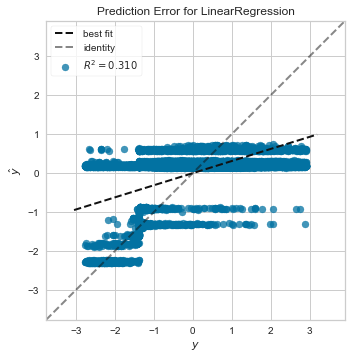

In [82]:
plot_model(tuned_lr, plot = 'error')

↑ Prediction Error Plot has doted line at 45%. This line is for actual and short doted line is the predicted or best fitted line.

#### Feature Importance Plot

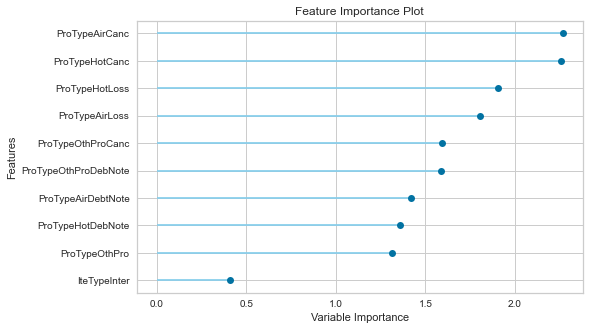

In [83]:
plot_model(tuned_lr, plot = 'feature')

↑ Above plot shows that among 17 feautures only 10 features are important.

## Forcasting<a id="100"></a>

Time Series forecasting can be done by Naive Approach,Moving Average,Simple Exponential Smoothing & Holt’s Linear Trend Model. Among of them, We solved forecasted value by MA(Moving Average) & Naive Approach.

#### Creating Moving average 

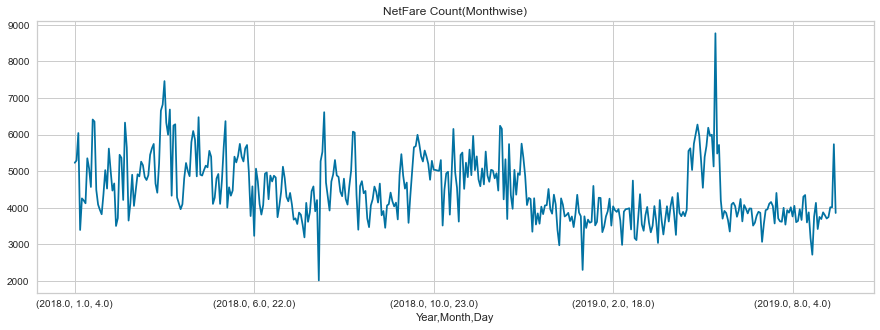

In [84]:
dummy_df.groupby(['Year','Month', 'Day'])['NetFare'].mean().plot(figsize=(15,5), title= 'NetFare Count(Monthwise)', fontsize=10)

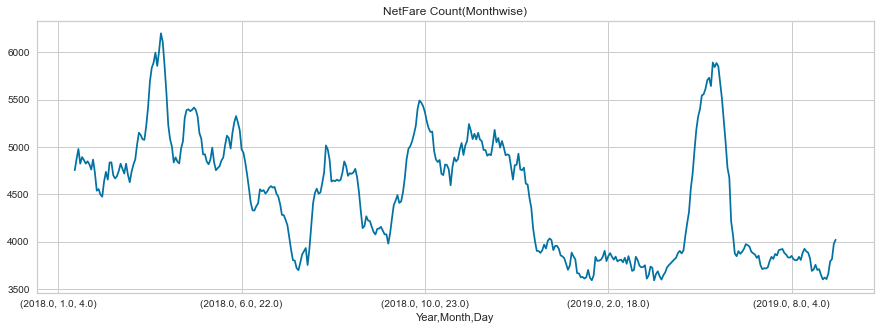

In [85]:
dummy_df_MA=dummy_df.groupby(['Year','Month', 'Day'])['NetFare'].mean().rolling(window=10).mean()
dummy_df_MA.plot(figsize=(15,5), title= 'NetFare Count(Monthwise)', fontsize=10)

↑ Trend showing Time Series is nearly Stationary i.e mean,variance are constant over time.

#### Naive or base model is created

In [86]:
dummy_df_base=pd.concat([dummy_df.groupby(['Year','Month', 'Day'])['NetFare'].mean(), dummy_df.groupby(['Year' ,'Month', 'Day'])['NetFare'].mean().shift(1)],axis=1)
dummy_df_base.head()

NetFare      NetFare
Year   Month Day                          
2018.0 1.0   4.0  5231.285714          NaN
             5.0  5292.575342  5231.285714
             6.0  6042.708661  5292.575342
             7.0  3394.442623  6042.708661
             8.0  4257.431507  3394.442623

Renaming NetFare cols with actual & forecast NetFare

In [87]:
dummy_df_base.columns=['actual_NetFare',  'forecast_NetFare']

Top 5 most records

In [88]:
dummy_df_base.head()

actual_NetFare  forecast_NetFare
Year   Month Day                                  
2018.0 1.0   4.0     5231.285714               NaN
             5.0     5292.575342       5231.285714
             6.0     6042.708661       5292.575342
             7.0     3394.442623       6042.708661
             8.0     4257.431507       3394.442623

Drop NaN value records

In [89]:
dummy_df_base.dropna(inplace=True)

Show records of data

In [90]:
dummy_df_base

actual_NetFare  forecast_NetFare
Year   Month Day                                  
2018.0 1.0   5.0     5292.575342       5231.285714
             6.0     6042.708661       5292.575342
             7.0     3394.442623       6042.708661
             8.0     4257.431507       3394.442623
             9.0     4201.646154       4257.431507
...                          ...               ...
2019.0 12.0  1.0     3747.051230       3707.877604
             2.0     4014.635171       3747.051230
             3.0     4013.856946       4014.635171
             4.0     5737.677165       4013.856946
             5.0     3858.658477       5737.677165

[424 rows x 2 columns]

↑ We have actual_NetFare & forecast_NetFare. forecast_NetFare showing normal forecasted values compared with actual.

## Predict on Test <a id="11"></a>

In [91]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1857.197,6.316526e+06,2513.27,0.3104,1.2069,2.835


The RMSLE on the Predict on Test set is 0.0965 compared to 0.0978 achieved on tuned_lr.This is not a significant difference.

## Finalize Model for Deployment<a id="12"></a>

In [92]:
final_lr= finalize_model(tuned_lr)

In [93]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)


In [94]:
predict_model(final_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1857.1589,6.316119e+06,2513.189,0.3105,1.2069,2.8285


## Saving the Model<a id="13"></a>

In [95]:
save_model(final_lr,'final_model_15Jun2020')

Transformation Pipeline and Model Succesfully Saved


#### According to Cohen (1992): <br> R-square value 0.12 or below indicate low, between 0.13 to 0.25 values indicate medium, 0.26 or above and above values indicate high effect size.

Our Final linear regression model has R-squared value=0.3105, so can be said as Model is High Effect Size.

----------------------------xxxxxxxxx--------------------------------xxxxxxxxxxx----------------------------------------xxxxxxxx---------------------------------------------

### Manual Model Creation

In [174]:
import statsmodels.formula.api as smf 

In [180]:
ml=smf.ols('NetFare~Year+Month+Day+Hour+Minute+ProTypeAir+ProTypeAirCanc+ProTypeAirDebtNote+ProTypeAirLoss+ProTypeHot+ProTypeHotCanc+ProTypeHotDebNote+ProTypeHotLoss+ProTypeOthPro+ProTypeOthProCanc+ProTypeOthProDebNote+IteTypeDomes+IteTypeInter', data=dummy_df).fit()

In [181]:
ml.params

Intercept              -47947.246921
Year                       38.085891
Month                      13.886954
Day                         0.497982
Hour                       -5.797652
Minute                      0.116815
ProTypeAir                371.586110
ProTypeAirCanc          -7114.762494
ProTypeAirDebtNote      -4527.616542
ProTypeAirLoss          -5686.502316
ProTypeHot                659.599389
ProTypeHotCanc          -7039.859851
ProTypeHotDebNote       -4367.074862
ProTypeHotLoss          -6024.887820
ProTypeOthPro           -4197.638219
ProTypeOthProCanc       -5033.222854
ProTypeOthProDebNote    -4986.867461
IteTypeDomes           -24585.885775
IteTypeInter           -23361.361146
dtype: float64

In [182]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NetFare   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     4700.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:10:26   Log-Likelihood:            -1.5461e+06
No. Observations:              167132   AIC:                         3.092e+06
Df Residuals:                  167115   BIC:                         3.092e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.795e+04   2.01e+04     -2.388      0.017   -8.73e+04   -8594.141
Year                    38.0859     15.818      2.408      0.016       7.082      69.089
Month                   13.8870      2.085      6.659      0.000       9.799      17.974
Day                      0.4980      0.696      0.716      0.474      -0.865       1.861
Hour                    -5.7977      1.683     -3.444      0.001      -9.097      -2.498
Minute                   0.1168      0.357      0.327      0.744      -0.583       0.817
ProTypeAir             371.5861   1832.485      0.203      0.839   -3220.044    3963.216
ProTypeAirCanc       -7114.7625   1837.822     -3.871      0.000   -1.07e+04   -3512.671
ProTypeAirDebtNote   -4527.6165   1830.419     -2.474      0.013   -8115.198    -940.035
ProTypeAirLoss       -5686.5023   1842.154     -3.087      0.002   -9297.085   -2075.920
ProTypeHot             659.5994   1833.737      0.360      0.719   -2934.486    4253.685
ProTypeHotCanc       -7039.8599   1852.489     -3.800      0.000   -1.07e+04   -3409.021
ProTypeHotDebNote    -4367.0749   2257.605     -1.934      0.053   -8791.932      57.782
ProTypeHotLoss       -6024.8878   2163.254     -2.785      0.005   -1.03e+04   -1784.958
ProTypeOthPro        -4197.6382   1836.496     -2.286      0.022   -7797.130    -598.147
ProTypeOthProCanc    -5033.2229   1838.992     -2.737      0.006   -8637.606   -1428.839
ProTypeOthProDebNote -4986.8675   1899.458     -2.625      0.009   -8709.764   -1263.971
IteTypeDomes         -2.459e+04      1e+04     -2.449      0.014   -4.43e+04   -4911.121
IteTypeInter         -2.336e+04      1e+04     -2.327      0.020    -4.3e+04   -3682.976
==============================================================================
Omnibus:                     4820.006   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10642.030
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       4.193   Cond. No.                     5.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared:	0.310 manual = 0.310 pycaret library detected(Model has errorless)

In [220]:
df_shorted=dummy_df[['ProTypeAir','ProTypeHot','IteTypeDomes','IteTypeInter','NetFare']]

In [221]:
df_shorted.head()

,ProTypeAir,ProTypeHot,IteTypeDomes,IteTypeInter,NetFare
Date,,,,,
2018-01-12,0,0,1,0,2160.00
2018-01-12,0,0,1,0,0.49
2018-01-12,1,0,1,0,6550.00
2018-01-12,1,0,1,0,6550.00
2018-11-30,1,0,1,0,5497.00


#### ProductTypeAir~NetFare Plot

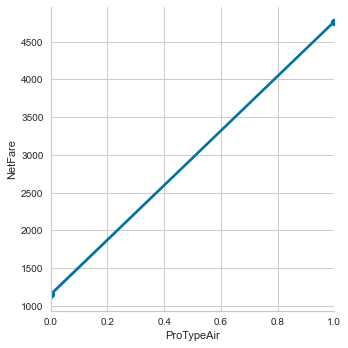

In [222]:
sns.lmplot(x="ProTypeAir", y="NetFare", data=df_shorted, x_estimator=np.mean);

↑ As Product Type Air increases NetFare also increases. As full paid of Air becomes NetFare=5000IRS.

#### ProductTypeHotel~NetFare Plot

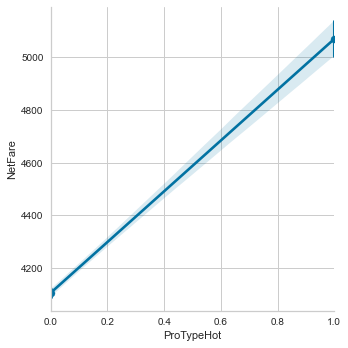

In [223]:
sns.lmplot(x="ProTypeHot", y="NetFare", data=df_shorted, x_estimator=np.mean);

↑ Shaded blue light portion is 95% confidence interval. As Product Type Hotel increases NetFare also increases.As full paid of Hotel becomes=5500IRS.

#### IteneraryTypeDomestic~NetFare Plot

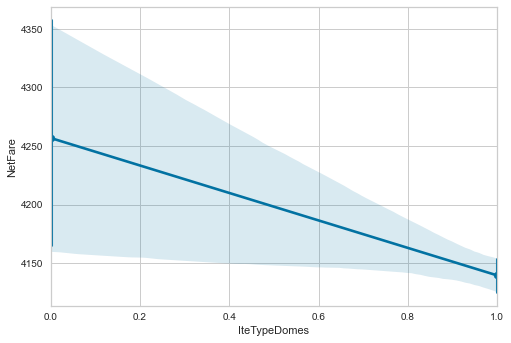

In [224]:
sns.regplot(x="IteTypeDomes", y="NetFare", data=df_shorted, x_estimator=np.mean);

↑ As Itenerary Type Domestic increases NetFare Decreases. Range of domestic fare = 4160 - 4350. Very clear with 95% confidence.

#### IteneraryTypeInternational~NetFare Plot

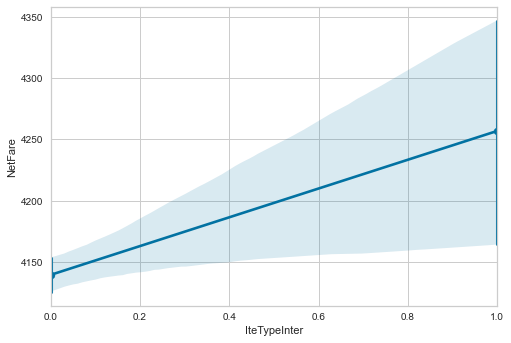

In [225]:
sns.regplot(x="IteTypeInter", y="NetFare", data=df_shorted, x_estimator=np.mean);

↑ As reverse to Domestic, as Itenerary Type International increases NetFare also increases. 95% confidence NetFare range=4160-4350.

<h4 style="color:red;">UI (User input) - Deployment</h4>

In [243]:
import pickle

In [244]:
with open('final_model_15Jun2020.pkl', 'wb') as file:
    pickle.dump(final_lr, file)

In [245]:
with open('final_model_15Jun2020.pkl', 'rb') as file:
    ml_reg=pickle.load(file)

['Year', 'Month', 'Day', 'Hour', 'Minute', 'ProTypeAir','ProTypeAirCanc', 'ProTypeAirDebtNote', 'ProTypeAirLoss', 'ProTypeHot',
       'ProTypeHotCanc', 'ProTypeHotDebNote', 'ProTypeHotLoss','ProTypeOthPro', 'ProTypeOthProCanc', 'ProTypeOthProDebNote',
       'IteTypeDomes', 'IteTypeInter']

In [246]:
ml_reg.predict([[2018,1,8,22,20,0,1,0,0,0,1,0,0,0,0,0,1]])

array([32.87924704])

#### Model predicts NetFare between [-4315 to 12941]. Air Cancellation & Other Product Cancellation influenced this NetFare. Exceeds value than these values are invalid.

Raw data has many many noises. Products are also not showing one direction flow. 

--------------------xxxxxxxxxx-------------------------xxxxxxxxxxxxxxxx-------------------------------------------------xxxxxxxxxxxxxxxxxxxxxx---------------------

<h4 style="color:red;">Summary::Final Model predicts NetFare all in one bundle. Not, Seperatly Air or Hotel or Domestic or International.</h4>
